# Step 1: Interact with the OpenWeatherMap API for Multiple Cities

In [58]:
import requests
import pandas as pd

# Set your API key and list of cities
API_KEY = '7b88301aaba50ec3b318648a7dec3df2'  # Replace with your API key
CITIES = ['Nashik', 'Pune', 'Mumbai']  # List of cities to fetch data for

# Initialize a list to hold the weather data
all_weather_data = []

# Loop through each city to fetch weather data
for city in CITIES:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}"
    response = requests.get(url)
    if response.status_code == 200:
        all_weather_data.append(response.json())
    else:
        print(f"Error fetching data for {city}: {response.status_code}")

# Check the retrieved data
all_weather_data


[{'coord': {'lon': 73.8, 'lat': 19.9833},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01n'}],
  'base': 'stations',
  'main': {'temp': 295.33,
   'feels_like': 294.78,
   'temp_min': 295.33,
   'temp_max': 295.33,
   'pressure': 1015,
   'humidity': 45,
   'sea_level': 1015,
   'grnd_level': 942},
  'visibility': 10000,
  'wind': {'speed': 2.43, 'deg': 65, 'gust': 2.47},
  'clouds': {'all': 6},
  'dt': 1730904621,
  'sys': {'country': 'IN', 'sunrise': 1730855325, 'sunset': 1730896087},
  'timezone': 19800,
  'id': 1261731,
  'name': 'Nashik',
  'cod': 200},
 {'coord': {'lon': 73.8553, 'lat': 18.5196},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01n'}],
  'base': 'stations',
  'main': {'temp': 297.02,
   'feels_like': 296.61,
   'temp_min': 297.02,
   'temp_max': 297.02,
   'pressure': 1014,
   'humidity': 44,
   'sea_level': 1014,
   'grnd_level': 941},
  'visibility': 10000,
  'wind': {'spe

# Step 2: Extract Relevant Weather Attributes

In [53]:
# Initialize a list to hold extracted weather attributes
weather_attributes_list = []

# Loop through the fetched weather data
for data in all_weather_data:
    if data:
        # Extract attributes
        temperature = data['main']['temp'] - 273.15  # Convert from Kelvin to Celsius
        humidity = data['main']['humidity']
        wind_speed = data['wind']['speed']
        precipitation = data.get('rain', {}).get('1h', 0)  # Precipitation in the last hour
        latitude = data['coord']['lat']  # Latitude of the city
        longitude = data['coord']['lon']  # Longitude of the city
        date_time = data.get('dt', None)  # Get date-time if available

        # Create a dictionary to hold weather attributes for the city
        city_weather_data = {
            'City': data['name'],
            'Temperature (°C)': temperature,
            'Humidity (%)': humidity,
            'Wind Speed (m/s)': wind_speed,
            'Precipitation (mm)': precipitation,
            'Latitude': latitude,
            'Longitude': longitude,
            'Date Time': date_time  # DateTime attribute
        }

        # Include atmospheric pressure if available
        if 'pressure' in data['main']:
            city_weather_data['Pressure (hPa)'] = data['main']['pressure']  # Atmospheric pressure

        # Append the data for the city to the list
        weather_attributes_list.append(city_weather_data)

# Create a DataFrame from the extracted attributes
weather_df = pd.DataFrame(weather_attributes_list)
weather_df['Date Time'] = pd.to_datetime(weather_df['Date Time'], unit='s')
# Display the DataFrame
weather_df


,City,Temperature (°C),Humidity (%),Wind Speed (m/s),Precipitation (mm),Latitude,Longitude,Date Time,Pressure (hPa)
0,Nashik,22.18,45,2.43,0,19.9833,73.8000,2024-11-06 14:50:21,1015
1,Pune,23.87,44,1.56,0,18.5196,73.8553,2024-11-06 14:50:10,1014
2,Mumbai,30.99,51,4.12,0,19.0144,72.8479,2024-11-06 14:41:33,1012


# Step 3: Clean and Preprocess the Data

In [54]:
# Check for missing values
print("Missing Values in Each Column:")
print(weather_df.isnull().sum())

# Fill missing values with the mean of the respective column, if applicable
for column in ['Temperature (°C)', 'Humidity (%)', 'Wind Speed (m/s)', 'Precipitation (mm)']:
    if weather_df[column].isnull().any():
        mean_value = weather_df[column].mean()
        weather_df[column].fillna(mean_value, inplace=True)

# Display the cleaned DataFrame
print("Cleaned Weather DataFrame:")
weather_df

Missing Values in Each Column:
City                  0
Temperature (°C)      0
Humidity (%)          0
Wind Speed (m/s)      0
Precipitation (mm)    0
Latitude              0
Longitude             0
Date Time             0
Pressure (hPa)        0
dtype: int64
Cleaned Weather DataFrame:


,City,Temperature (°C),Humidity (%),Wind Speed (m/s),Precipitation (mm),Latitude,Longitude,Date Time,Pressure (hPa)
0,Nashik,22.18,45,2.43,0,19.9833,73.8000,2024-11-06 14:50:21,1015
1,Pune,23.87,44,1.56,0,18.5196,73.8553,2024-11-06 14:50:10,1014
2,Mumbai,30.99,51,4.12,0,19.0144,72.8479,2024-11-06 14:41:33,1012


In [55]:
# Calculate average, max, and min values
average_temperature = weather_df['Temperature (°C)'].mean()
max_temperature = weather_df['Temperature (°C)'].max()
min_temperature = weather_df['Temperature (°C)'].min()
total_precipitation = weather_df['Precipitation (mm)'].sum()
average_humidity = weather_df['Humidity (%)'].mean()
average_wind_speed = weather_df['Wind Speed (m/s)'].mean()

# Print the analysis results
print(f"Average Temperature (°C): {average_temperature}")
print(f"Max Temperature (°C): {max_temperature}")
print(f"Min Temperature (°C): {min_temperature}")
print(f"Total Precipitation (mm): {total_precipitation}")
print(f"Average Humidity (%): {average_humidity}")
print(f"Average Wind Speed (m/s): {average_wind_speed}")


Average Temperature (°C): 25.680000000000007
Max Temperature (°C): 30.99000000000001
Min Temperature (°C): 22.180000000000007
Total Precipitation (mm): 0
Average Humidity (%): 46.666666666666664
Average Wind Speed (m/s): 2.703333333333333


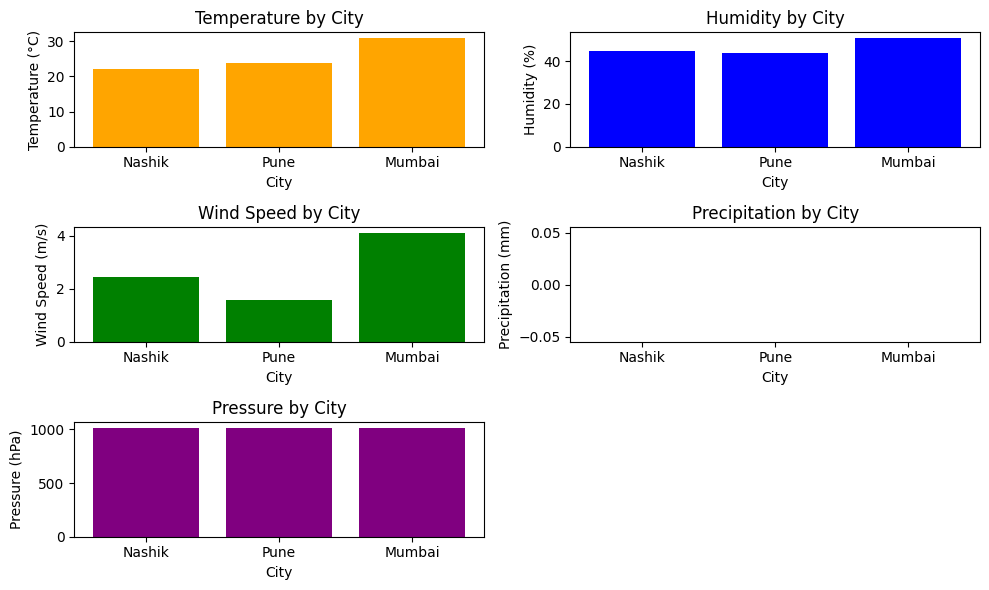

In [56]:
import matplotlib.pyplot as plt

# Create subplots to visualize the data
plt.figure(figsize=(10, 6))

# Bar plot for temperature
plt.subplot(3, 2, 1)
plt.bar(weather_df['City'], weather_df['Temperature (°C)'], color='orange')
plt.title('Temperature by City')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')

# Bar plot for humidity
plt.subplot(3, 2, 2)
plt.bar(weather_df['City'], weather_df['Humidity (%)'], color='blue')
plt.title('Humidity by City')
plt.xlabel('City')
plt.ylabel('Humidity (%)')

# Bar plot for wind speed
plt.subplot(3, 2, 3)
plt.bar(weather_df['City'], weather_df['Wind Speed (m/s)'], color='green')
plt.title('Wind Speed by City')
plt.xlabel('City')
plt.ylabel('Wind Speed (m/s)')

# Bar plot for precipitation
plt.subplot(3, 2, 4)
plt.bar(weather_df['City'], weather_df['Precipitation (mm)'], color='purple')
plt.title('Precipitation by City')
plt.xlabel('City')
plt.ylabel('Precipitation (mm)')

plt.subplot(3, 2, 5)
plt.bar(weather_df['City'], weather_df['Pressure (hPa)'], color='purple')
plt.title('Pressure by City')
plt.xlabel('City')
plt.ylabel('Pressure (hPa)')
plt.tight_layout()
plt.show()


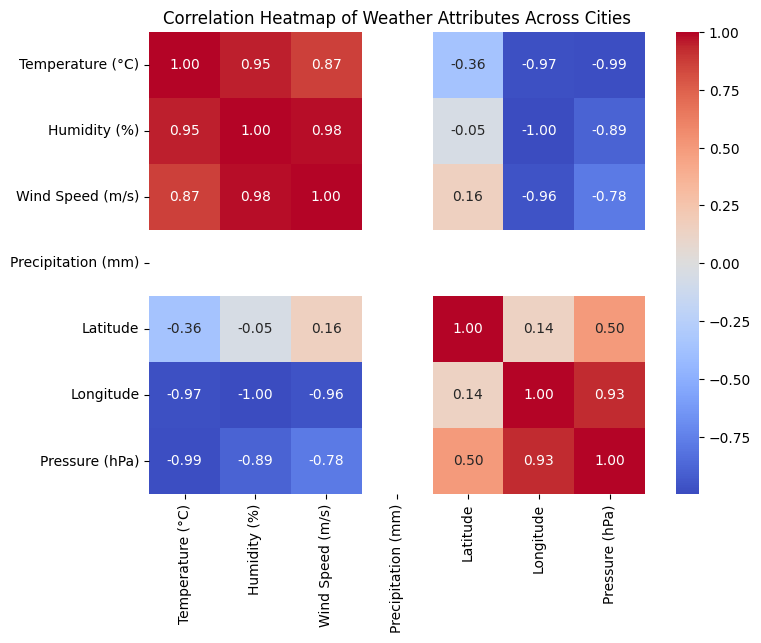

In [57]:
# Visualization function
def visualize_correlations_multiple_cities(df):
    # Filter for only numeric columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    
    # Drop rows with missing values
    numeric_df = numeric_df.dropna()
    
    # Check if there is any data to plot
    if not numeric_df.empty:
        plt.figure(figsize=(8, 6))
        correlation = numeric_df.corr()
        sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Heatmap of Weather Attributes Across Cities')
        plt.show()
    else:
        print("No numeric data available for correlation analysis.")

# Usage
visualize_correlations_multiple_cities(weather_df)